<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/Ed_AI__DL_M9_inclass_Handwritten_Digits_using_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Handwritten Digits using Autoencoder TensorFlow

## Problem Statement
- MNIST data - (None,784)
- Autoencoders
- Reconstruct the input
- Encoder layer : (None,784),(784,32) = (None,32) #compressed representation
- Decoder layer : (None,32),(32,784) = (None,784) #reconstructed layer

![alt text](https://i.imgur.com/Su00XUA.png)

## Import the required libraries - tensorflow

In [15]:
# for data analysis
import pandas as pd
import numpy as np
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for model training
import tensorflow as tf # Importing Tensorflow Library
from tensorflow.keras.datasets import mnist # importing mnist data set
from tensorflow.keras.layers import Input,Dense,Activation # fully connected
from tensorflow.keras.models import Model #functional compilation
from tensorflow.keras.optimizers import Adam

- 2 ways to compose a deep learning code
- Sequential Process - No need to intermediate outputs
- Require intermediate outputs - Functional Compostion
- Functional Composition - Callable instance - call uopn last layer - will be using this concept as after encoder we need to output to execute the Decoder to re-construct the input.

## Pre-process the dataset

In [3]:
(X_train,_),(X_test,_) = mnist.load_data()
# y_train and y_ test was kept balnk as it is not required at all. Which help to reduce the memory

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# normalize the input value in range 0 to 1 as we will be using sigmoid function which range 0 to 1
X_train =X_train.astype('float32')/255
X_test =X_test.astype('float32')/255

#current train dataset shape is 60000*28*28
#current test dataset shape is 10000*28*28
#but we need dataset in 784 pixel,hence we need to reshape
X_train=X_train.reshape((len(X_train),784))
X_test=X_test.reshape((len(X_test),784))

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Autoencoder Structure

## Encoder

In [6]:
encoding_dim = 32 # encoder representation - 784 pixel to only 32 pixel as output (None,32).

#Input Layer.define placeholder for our input.
input_image = Input(shape = (784,)) # input layer - after 784 it is just comma becuase it's dentoes not of channel.
# for black and white image there is only one channel but it were colour image it would  have (784,3) as colour is having 3 channel - RGB- Red , Green and Blue.

#encoded layer
#Dense - fully connected Layer , Sigmoid Activation Function
encoded = Dense(encoding_dim,activation = 'sigmoid')(input_image) # None,32
# we require Dense - Fully Connected Layer with 32 nodes with Sigmoid Activation
# (None,784).() = (None,32)

## Decoder

In [7]:
# (None,32),(32,784) = (None,784) #reconstructed layer
decoded = Dense(784,activation = 'sigmoid')(encoded) # 784 represents the no of neurons , value will be always how  many neurons we want in next layer


## Full Autoencoder

In [8]:
autoencoder = Model(input_image,decoded)
# input_image -- input image
# decoded -- reconstructed image

# Autoencoder Model

## Build the Encoder Model

In [9]:
encoder = Model(input_image,encoded)

## Build the Decoder Model

In [10]:
#(None,32),(32,784) = (None,784)
encoder_input = Input(shape = (encoding_dim,))
# retrieve the last layer of the autoencoder layer
decoded_layer = autoencoder.layers[-1] # last layer
decoder = Model(encoder_input,decoded_layer(encoder_input)) # 32 pixel image will get convert into 784 pixel as orginial image


## Complete Model - Encoder + Decoder

In [11]:
#model compilation
autoencoder.compile(loss = 'binary_crossentropy',optimizer = Adam(learning_rate  = 0.001))
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#model fitting
autoencoder.fit(X_train,X_train,
                epochs=15,
                batch_size =16,
                shuffle = True,
                validation_data = (X_test,X_test))

Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2873 - val_loss: 0.2304
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2173 - val_loss: 0.1912
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.1878 - val_loss: 0.1785
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.1776 - val_loss: 0.1732
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1726 - val_loss: 0.1676
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.1681 - val_loss: 0.1646
Epoch 7/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1654 - val_loss: 0.1630
Epoch 8/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1642 - val_loss: 0.1618
Epoch 9/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1631 - val_loss: 0.1600
Epoch 10/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1597 - val_loss: 0.1519
Epoch 11/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1521 - val_loss: 0.1487
Epoch 12/15
3750/3750 ━━━━━━

In [13]:
# prediction
encoded_imgs = encoder.predict(X_test[0:10]) #  10 test images  first 784 - 32
decoded_imgs = decoder.predict(encoded_imgs) #32 -784

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


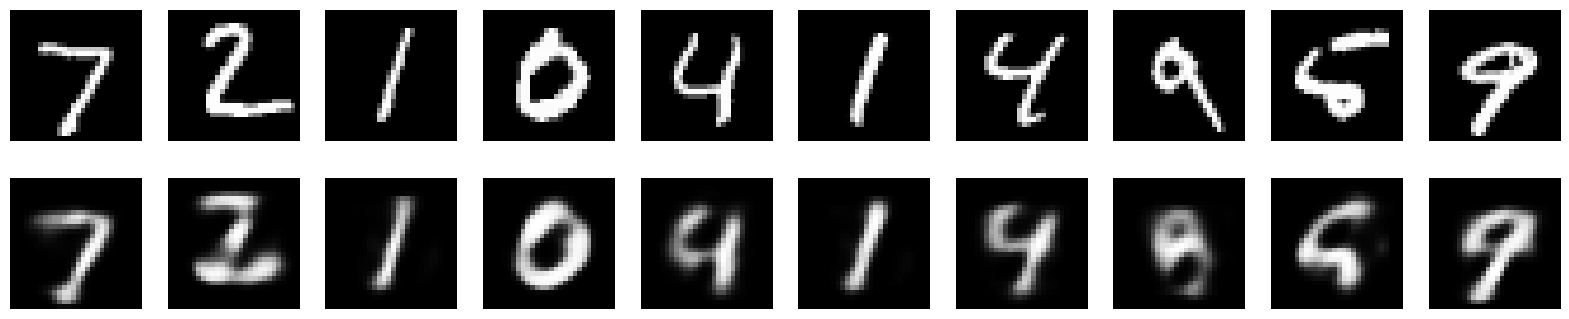

In [18]:
#visualize the predicted images
n = 10
plt.figure(figsize=(20,4))
# original images - 10 - first row
# reconstructured images - 10- second row
for i in range(n):
  #original images
  plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  plt.axis('off')
  #reconstructured images
  plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  plt.axis('off')